Objective:- The patient would survive cancer treatment or not after 5 years, based upon the age of patient, year of treatment and numbers of positive axillary nodes. Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load habermen.csv into a pandas data frame
c_df=pd.read_csv("haberman.csv",names=['age','year','positive_axillary_nodes','status'])
c_df.head()

,age,year,positive_axillary_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
c_df.shape

(306, 4)

In [5]:
c_df.columns

Index(['age', 'year', 'positive_axillary_nodes', 'status'], dtype='object')

In [6]:
#how many data points for each status present
#how many cancer patients survived after surgery '1' means suvived '2' means died within 3 years
c_df['status'].value_counts()
#imbalanced data set

1    225
2     81
Name: status, dtype: int64

## Univariate Analysis

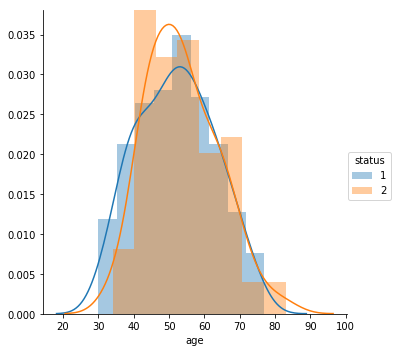

In [7]:
sns.FacetGrid(c_df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

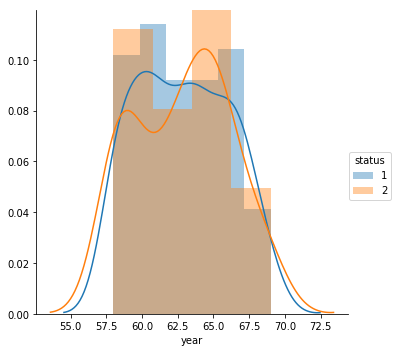

In [8]:
sns.FacetGrid(c_df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show()

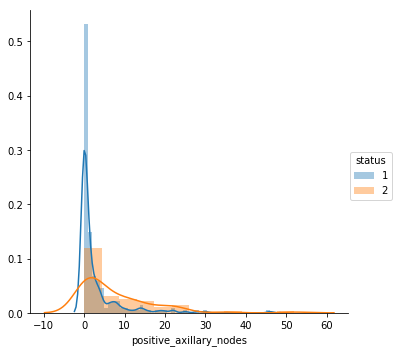

In [9]:
sns.FacetGrid(c_df, hue="status", size=5) \
   .map(sns.distplot, "positive_axillary_nodes") \
   .add_legend();
plt.show();

In [10]:
c_df_survived = c_df.loc[c_df["status"] == 1];
c_df_nsurvived = c_df.loc[c_df["status"] == 2];
print("Means:")
print(np.mean(c_df_survived['age']))
print(np.mean(c_df_nsurvived['age']))

Means:
52.01777777777778
53.67901234567901


## Observations

1 .Among all the above three histogram ,positive_axillary_node is useful property of patient to differentiate between survival status and the patient who died

1. most of the survived people having zero positive axillary nodes
2. The mean age of the people who survived is 52
3. The mean age of the people who not survived 54

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


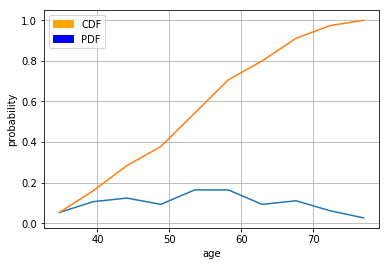

In [11]:
import matplotlib.patches as p
counts,bin_edges=np.histogram(c_df_survived['age'],bins=10,density=True)
print(counts)
pdf=counts/(sum(counts))
print(bin_edges)
#compute cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
o_c = p.Patch(color='orange', label='CDF')
o_b = p.Patch(color='blue', label='PDF')
plt.legend(handles=[o_c,o_b])
plt.grid()
plt.xlabel('age')
plt.ylabel('probability')
plt.show()

approx. 75% of people having age between <=60 who has survived.

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


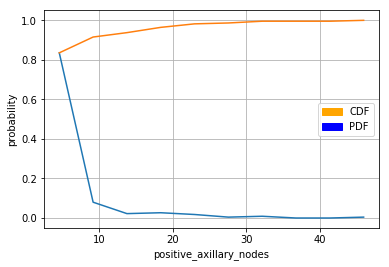

In [12]:
counts,bin_edges=np.histogram(c_df_survived['positive_axillary_nodes'],bins=10,density=True)
print(counts)
pdf=counts/(sum(counts))
print(bin_edges)
#computer cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
o_c = p.Patch(color='orange', label='CDF')
o_b = p.Patch(color='blue', label='PDF')
plt.legend(handles=[o_c,o_b])
plt.xlabel('positive_axillary_nodes')
plt.ylabel('probability')
plt.show()

There are approx. 82% of people who is having less than 4 positive_axillary_nodes

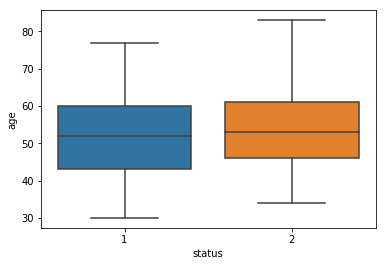

In [13]:
#BOX plot
sns.boxplot(x='status',y='age', data=c_df)
plt.show()

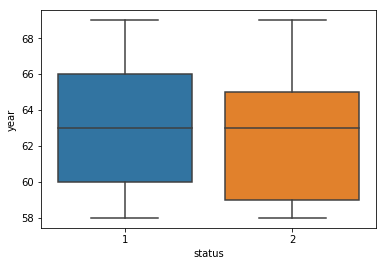

In [14]:
sns.boxplot(x='status',y='year', data=c_df)
plt.show()

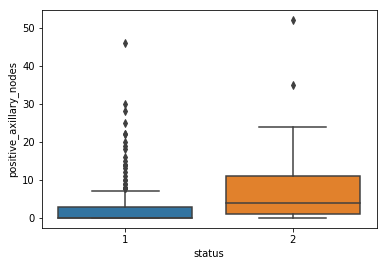

In [15]:
sns.boxplot(x='status',y='positive_axillary_nodes', data=c_df)
plt.show()

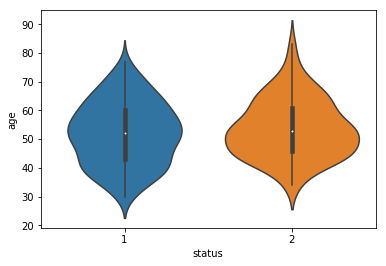

In [16]:
#violin plots
sns.violinplot(x="status", y="age", data=c_df, size=8)
plt.show()

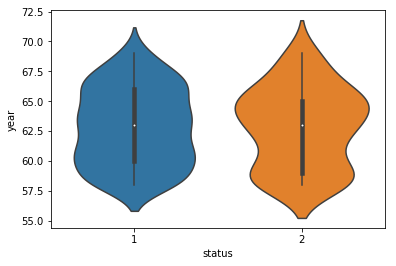

In [17]:
sns.violinplot(x="status", y="year", data=c_df, size=8)
plt.show()

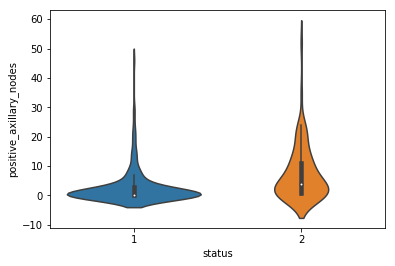

In [18]:
sns.violinplot(x="status", y="positive_axillary_nodes", data=c_df, size=8)
plt.show()

## Observations

from box plot and violin plot we can predict the below conclusions

1. 25%tile of status 2 is below the year 1960, therefore we can predict that before 1960 the survival rate is less
2. 75%tile of status 1 is closed to the 1966 therefore the survival rate is more


## Bivariate Analysis

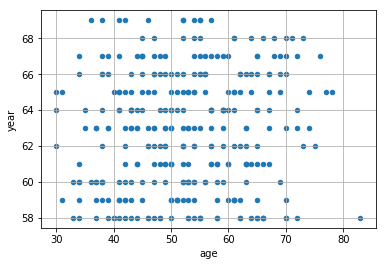

In [19]:
c_df.plot(kind='scatter',x='age',y='year')
plt.grid()
plt.show()

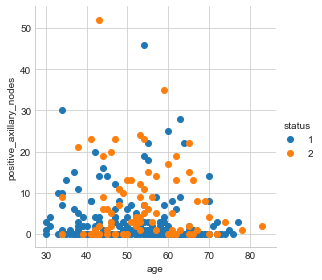

In [20]:
# 2-D Scatter plot with color-coding
sns.set_style('whitegrid')
sns.FacetGrid(c_df,hue='status',size=4).map(plt.scatter,'age','positive_axillary_nodes').add_legend()
plt.show()

From the above graph we cannot conclude anything so we can remove it

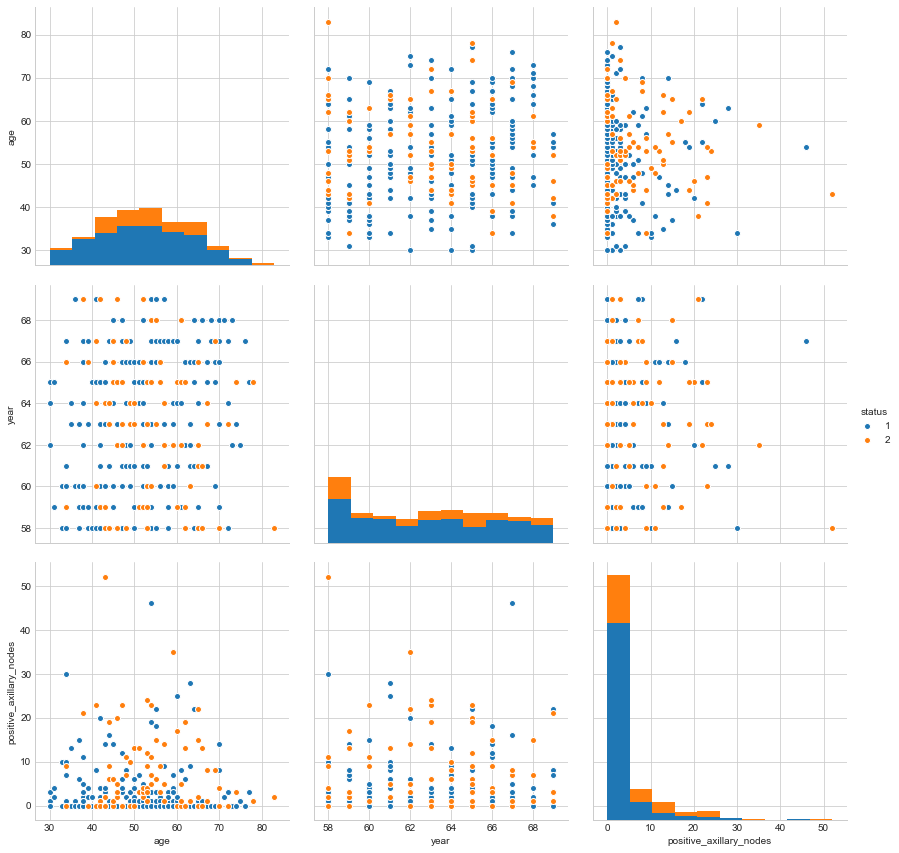

In [21]:
sns.pairplot(c_df,hue="status",size=4,vars=['age','year','positive_axillary_nodes'])
plt.show()

## Observation

no significant observations can be taken out of pair plots because of too much overlapping

## Conclusion

1. Based on univariate analysis we can conclude that,most of the person having '0' positive axillary nodes were saved.
2. positive_aiillary_nodes is the most important feature which is useful towards classification.
3. From PDF and CDF we can conclude that the person who survived has age in between 50 to 60.
4. From box plot 'year analysis' we can conclude that before 1960 less no. of patients were survived who gone under treatment but after 1966 more people were survived there the probability is increased for the people who gone under treatment after 1966.
5. The person having status '1' means they have been survived , and the person having status '2' is the person who died within 3 years after cancer treatment